ML modeling for the dataset_final

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing
import seaborn as sns

In [2]:
df = pd.read_csv('dataset_final.csv', index_col=0)

df.rename(columns={"GDP_Millions" : "GDP_USD"})

,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,GDP_USD,%_expenditure_gdp
Country Name,,,,,,,,
Australia,2010,93.199532,72.798973,22.09754243,4.140552,0.901227,1146138465604,5.550060
Australia,2011,93.608101,74.061668,23.37206897,4.600276,0.939168,1396649906339,5.074510
Australia,2012,94.448936,76.483017,24.64659551,5.060001,0.977109,1546151783873,4.869000
Australia,2013,91.080772,72.036842,26.74360085,5.756980,0.985780,1576184467015,5.229740
Australia,2014,91.450500,71.233940,24.94644928,5.324850,0.934080,1467483705132,5.164770
...,...,...,...,...,...,...,...,...
West Bank and Gaza,2015,60.398998,39.021870,17.12458992,1.604140,0.210680,13972400000,5.141360
West Bank and Gaza,2016,61.101990,39.635609,17.58827972,1.559250,0.210260,15405400000,5.717730
West Bank and Gaza,2017,62.976317,41.116795,18.35334595,1.578140,0.228594,15789169600,5.052367


In [4]:
#calculating the actual investment in education by a country
df['usd_expenditure_gdp'] = df['GDP_Millions']*df['%_expenditure_gdp']/100
df['usd_expenditure_gdp'].head(5)

Country Name
Australia    6.361137e+10
Australia    7.087314e+10
Australia    7.528213e+10
Australia    8.243035e+10
Australia    7.579216e+10
Name: usd_expenditure_gdp, dtype: float64

In [6]:
#Analysing a single year at a time
df1 = df[df['Year'] == 2019]

In [7]:
#code reference : https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [8]:
#select the part of the dataframe to analyze 
X = df1[['LowerSecondaryAttainment','UpperSecondaryAttainment','BachelorsAttainment','MastersAttainment','DoctoralAttainment','usd_expenditure_gdp']].to_numpy()

#standardizing the data
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [9]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X_scaled)

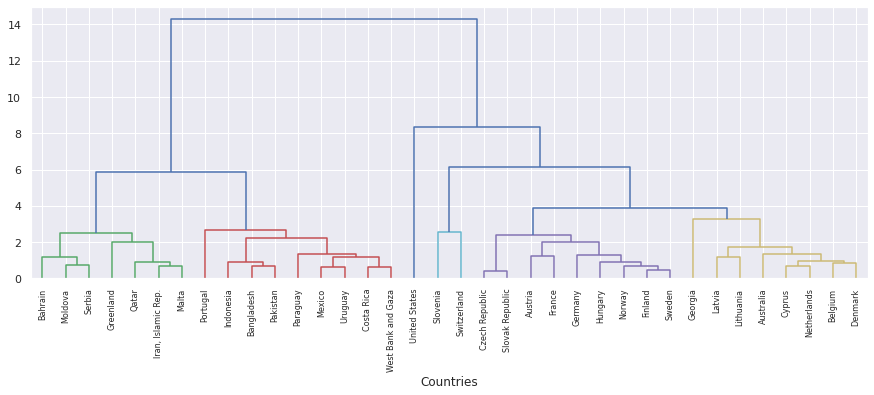

In [12]:
#plotting the dendrogram for visualizing the clustering of the countries
plt.figure(figsize=(15,5))
plot_dendrogram(model, p=10, labels=df1.index,leaf_rotation=90, leaf_font_size=8,color_threshold=3.5)
plt.xlabel("Countries")
plt.show()

sns.set(rc={'figure.figsize': (15, 10)})
sns.set_theme(style='darkgrid', context="notebook")

We can see that countries cluster primarily according to the investment of the country in Education. Which means that more the investment in education higher the number of people with higher levels of educational attainment which in turn contributes to the rise in the overall GDP of the countries.